In [44]:
import pandas as pd
import numpy as np

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [45]:
# Show the amount of missing data in each column in the training set
train_set.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

values = {"Alley": 'No Alley Access', "PoolQC": "No Pool", "Fence": "No Fence", "MiscFeature": "None"}

train_set.fillna(value=values, inplace=True)
test_set.fillna(value=values, inplace=True)

# Store all columns with more than 10% missing data in a list
missing_columns = [col for col in train_set.columns if train_set[col].isnull().sum() / len(train_set) > 0.1]

# Remove all columns with more than 10% missing data if the column is not the target column
train_set.dropna(axis=1, thresh=len(train_set) * 0.9, inplace=True)
train_set.dropna(axis=1, thresh=len(test_set) * 0.9, inplace=True)

train_set.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [47]:
# Get numerical columns from train set
numerical_cols = train_set.select_dtypes(include=['int64', 'float64']).columns

# Use IterativeImputer to fill in the missing data in the training set of numerical columns
imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(train_set[numerical_cols])
train_set[numerical_cols] = imputer.transform(train_set[numerical_cols])
train_set.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [48]:
# Get categorical columns from train set
categorical_cols = train_set.select_dtypes(include=['object']).columns


# Fill in the missing data in the training set of categorical columns with the most common value in the column
for col in categorical_cols:
    train_set[col].fillna(train_set[col].value_counts().index[0], inplace=True)
train_set.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

C:\Users\noudy\AppData\Roaming\JetBrains\DataSpell2022.1\projects\workspace\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

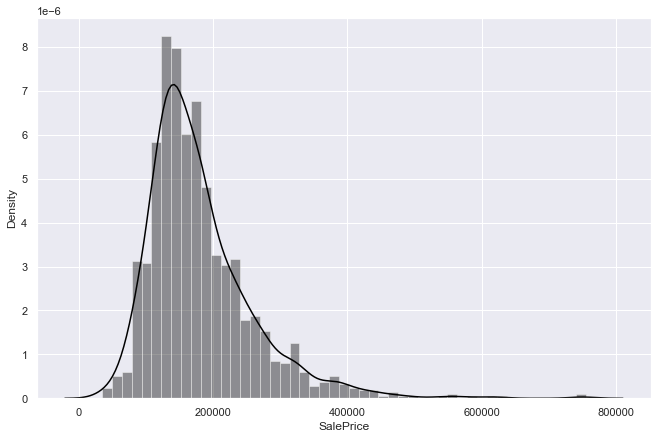

In [49]:
import seaborn as sns

# Determine skewness of SalePrice
train_set.SalePrice.skew()

sns.set(rc={"figure.figsize": (11, 7)})
sns.distplot(train_set["SalePrice"], color="black")

In [50]:
# Get categorical columns from train set
categorical_cols = train_set.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_set[categorical_cols] = ordinal_encoder.fit_transform(train_set[categorical_cols])

train_set

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,8450.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,2.0,20.0,3.0,9600.0,1.0,1.0,3.0,3.0,0.0,2.0,...,0.0,3.0,4.0,1.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,3.0,60.0,3.0,11250.0,1.0,1.0,0.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,4.0,70.0,3.0,9550.0,1.0,1.0,0.0,3.0,0.0,0.0,...,0.0,3.0,4.0,1.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,5.0,60.0,3.0,14260.0,1.0,1.0,0.0,3.0,0.0,2.0,...,0.0,3.0,4.0,1.0,0.0,12.0,2008.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3.0,7917.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,8.0,2007.0,8.0,4.0,175000.0
1456,1457.0,20.0,3.0,13175.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,2.0,1.0,0.0,2.0,2010.0,8.0,4.0,210000.0
1457,1458.0,70.0,3.0,9042.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,0.0,3.0,2500.0,5.0,2010.0,8.0,4.0,266500.0
1458,1459.0,20.0,3.0,9717.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,4.0,2010.0,8.0,4.0,142125.0


In [51]:
# Correlation matrix for train_set
corr_matrix = train_set.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

# Create list of variables with correlation greater than 0.5 with SalePrice
corr_vars = [k for k in corr_matrix.index if corr_matrix['SalePrice'][k] > 0.4 or corr_matrix['SalePrice'][k] < -0.4]
# Remove SalePrice from corr_vars
corr_vars.remove('SalePrice')
corr_vars

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea']

      OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  \
921           5.0     1900.0        2003.0         0.0        3.0       3.0   
520           4.0     1900.0        2000.0         0.0        3.0       3.0   
401           7.0     2005.0        2005.0         0.0        2.0       2.0   
280           7.0     1989.0        1989.0       340.0        2.0       2.0   
1401          6.0     2004.0        2004.0         0.0        3.0       3.0   
...           ...        ...           ...         ...        ...       ...   
715           6.0     1974.0        1974.0       174.0        3.0       2.0   
905           5.0     1954.0        1954.0       110.0        3.0       3.0   
1096          6.0     1914.0        2006.0         0.0        3.0       3.0   
235           6.0     1971.0        1971.0       604.0        3.0       3.0   
1061          3.0     1935.0        1950.0         0.0        1.0       3.0   

      TotalBsmtSF  HeatingQC  1stFlrSF  GrLivArea  

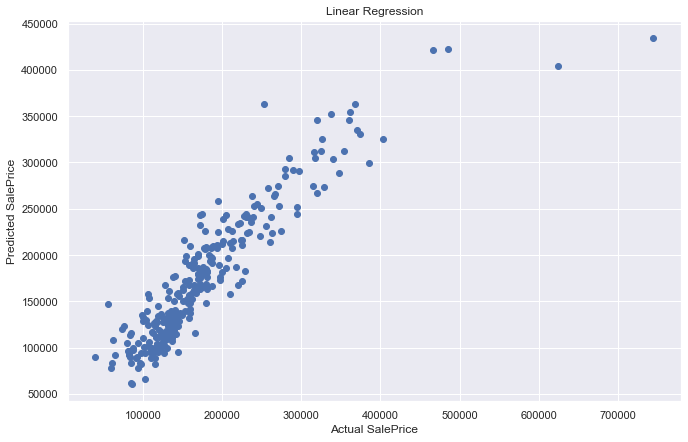

Multi linear regression: 
R2-score: 0.8347088699029009
MAE: 21246.340432473757
RMSE: 0.1785685409285831


In [52]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Predict SalePrice using all variables with correlation greater than 0.5 or less than -0.5 with SalePrice
X = train_set[corr_vars]
# Drop SalePrice from X
y = train_set['SalePrice']


# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print(X_train)
# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predictions_linear_regression = linear_regression.predict(X_test)

# Show graph of predicted values vs actual values
plt.scatter(y_test, predictions_linear_regression)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Linear Regression')
plt.show()

print("Multi linear regression: ")
print("R2-score:", r2_score(y_test, predictions_linear_regression))
print("MAE:", mean_absolute_error(y_test, predictions_linear_regression))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
log_y_test = np.log(y_test)
log_predictions_xgb = np.log(predictions_linear_regression)

print("RMSE:", sqrt(mean_squared_error(log_y_test, log_predictions_xgb)))

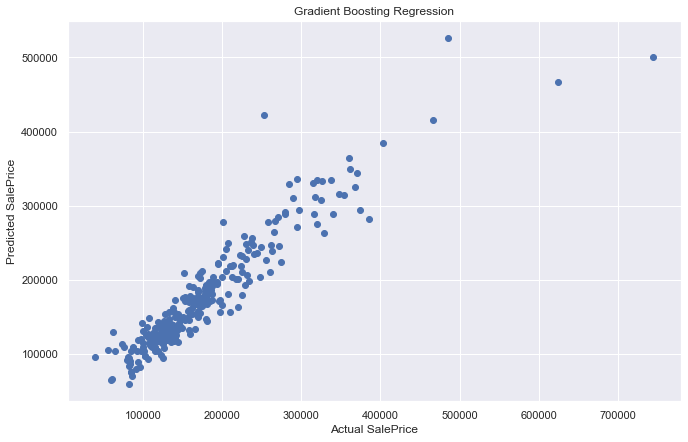

Multi linear regression: 
R2-score: 0.8756865445811147
MAE: 18033.171293093877


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

gbr = make_pipeline(RobustScaler(),
                    GradientBoostingRegressor(n_estimators = 7000, learning_rate = 0.01,
                                              max_depth = 5, min_samples_split = 12, min_samples_leaf = 16,
                                              loss = "huber", max_features = "sqrt", random_state = 11))

gbr_model = gbr.fit(X_train, y_train)
predictions_gbr = gbr_model.predict(X_test)


# Show graph of predicted values vs actual values
plt.scatter(y_test, predictions_gbr)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Gradient Boosting Regression')
plt.show()

print("Multi linear regression: ")
print("R2-score:", r2_score(y_test, predictions_gbr))
print("MAE:", mean_absolute_error(y_test, predictions_gbr))

[17:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




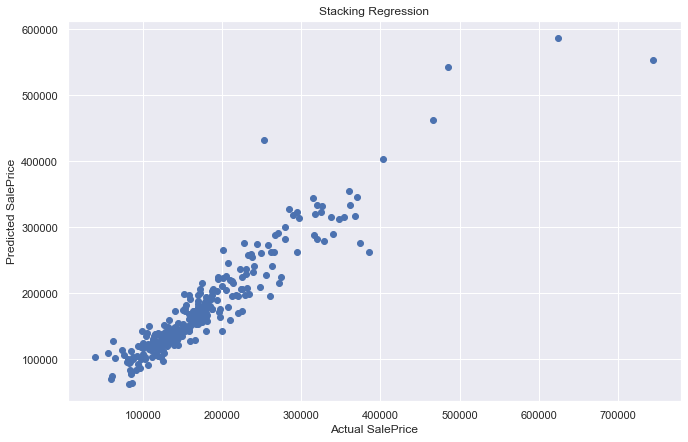

Stacking Regression: 
R2-score: 0.891299094367405
MAE: 17743.91007598459
RMSE: 0.15344242545769093


In [54]:
from mlxtend.regressor import StackingCVRegressor
import catboost as cb
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, HuberRegressor

xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.01,
                   max_depth = 5, min_samples_split = 12, min_samples_leaf = 16,
                   loss = "huber", max_features = "sqrt", random_state = 11)
xgb_model = xgb.fit(X_train, y_train)
predictions_xgb = xgb_model.predict(X_test)


# Show graph of predicted values vs actual values
plt.scatter(y_test, predictions_xgb)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Stacking Regression')
plt.show()


print("Stacking Regression: ")
print("R2-score:", r2_score(y_test, predictions_xgb))
print("MAE:", mean_absolute_error(y_test, predictions_xgb))

# Calculate the RMSE between logarithm of the predicted and the logarithm of the actual values
log_y_test = np.log(y_test)
log_predictions_xgb = np.log(predictions_xgb)

print("RMSE:", sqrt(mean_squared_error(log_y_test, log_predictions_xgb)))


In [39]:
from sklearn.ensemble import StackingRegressor

ridgemodel = Ridge(alpha=26)

xgbmodel = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.02)

svrmodel = SVR(C=8, epsilon=0.00005, gamma=0.0008)

hubermodel = HuberRegressor(alpha=30,epsilon=3,fit_intercept=True,max_iter=2000)

cbmodel = cb.CatBoostRegressor(loss_function='RMSE',colsample_bylevel=0.3, depth=2,
                               l2_leaf_reg=20, learning_rate=0.005, n_estimators=15000, subsample=0.3,verbose=False)

estimators = [('ridgemodel', Ridge(alpha=26)), ('svrmodel', SVR(C=8, epsilon=0.00005, gamma=0.0008)), ('hubermodel', HuberRegressor(alpha=30,epsilon=3,fit_intercept=True,max_iter=10000)), ('cbmodel', cb.CatBoostRegressor(loss_function='RMSE',colsample_bylevel=0.3, depth=2,
                                                                                                                                                                                                                             l2_leaf_reg=20, learning_rate=0.005, n_estimators=15000, subsample=0.3,verbose=False))]

stackmodel = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.02))

In [42]:
import math


print("-----------------------------")
print("Overview of model performance")
print("-----------------------------")
for i in [ridgemodel,hubermodel,cbmodel,svrmodel,xgbmodel,stackmodel]:
    i.fit(X_train, y_train)

    print(f"For model {i}")
    print(f"Train RMSE: {round(math.sqrt(mean_squared_error(y_train,i.predict(X_train))), 4)}")
    print(f"Test RMSE: {round(math.sqrt(mean_squared_error(y_test,i.predict(X_test))), 4)}")
    print("-----------------------------")
print("-----------------------------")
print("Average Test RMSE for ensemble model: ")
fit = (svrmodel.predict(X_test_target) + xgbmodel.predict(X_test_target) + stackmodel.predict(X_test_target) + ridgemodel.predict(X_test_target) + hubermodel.predict(X_test_target) + cbmodel.predict(X_test_target)) / 6
print(math.sqrt(mae(y_test_log,fit)))

-----------------------------
Overview of model performance
-----------------------------
For model Ridge(alpha=26)
Train RMSE: 35279.5929
Test RMSE: 34208.5417
-----------------------------
For model HuberRegressor(alpha=30, epsilon=3, max_iter=2000)
Train RMSE: 46200.9178
Test RMSE: 41059.8623
-----------------------------
For model <catboost.core.CatBoostRegressor object at 0x000001D0B2F13700>
Train RMSE: 22171.9362
Test RMSE: 26341.0546
-----------------------------
For model SVR(C=8, epsilon=5e-05, gamma=0.0008)
Train RMSE: 79933.408
Test RMSE: 85141.7094
-----------------------------
For model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.02, max_bin=256, max_

NameError: name 'X_test_target' is not defined

[12:33:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:33:24] WARNING: C:/Users/Administrator/workspace/xgboost

C:\Users\noudy\AppData\Roaming\JetBrains\DataSpell2022.1\projects\workspace\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\noudy\AppData\Roaming\JetBrains\DataSpell2022.1\projects\workspace\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


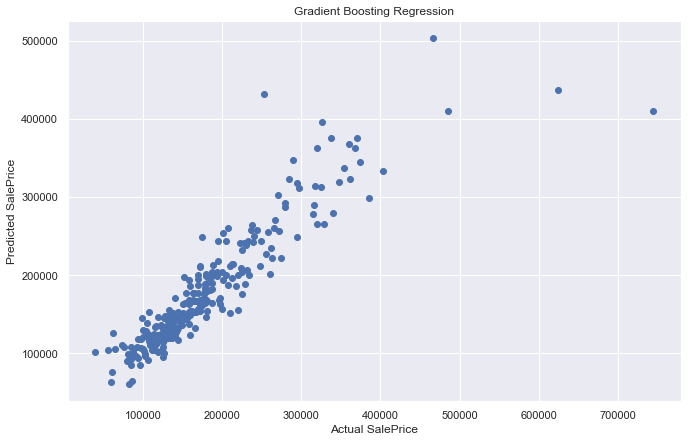

Multi linear regression: 
R2-score: 0.8346313836560116
MAE: 19633.637895976026


In [108]:
from mlxtend.regressor import StackingCVRegressor

stacked = StackingCVRegressor(regressors=(linear_regression, xgb, gbr),
                              meta_regressor=xgb)

stacked_model = stacked.fit(np.array(X_train), np.array(y_train))

predictions_stacked = stacked_model.predict(X_test)


# Show graph of predicted values vs actual values
plt.scatter(y_test, predictions_stacked)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Gradient Boosting Regression')
plt.show()

print("Multi linear regression: ")
print("R2-score:", r2_score(y_test, predictions_stacked))
print("MAE:", mean_absolute_error(y_test, predictions_stacked))

In [181]:
# Remove all columns in missing_cols from train_set
#test_set.drop(missing_columns, axis=1, inplace=True)
test_set.isnull().sum()

# List of all categorical columns
categorical_columns = [col for col in test_set.columns if test_set[col].dtype == 'object']

print('Categorical columns:', categorical_columns)

# Print amount of missing data for each column
print('Missing data per column:')
print(test_set.isnull().sum() / len(test_set))

#-------------------------------------- Filling Missing Values --------------------------------------------------#

# Get numerical columns from train set
numerical_cols = test_set.select_dtypes(include=['int64', 'float64']).columns

# Use IterativeImputer to fill in the missing data in the training set of numerical columns
imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(test_set[numerical_cols])
test_set[numerical_cols] = imputer.transform(test_set[numerical_cols])
test_set.isnull().sum()

# Get categorical columns from train set
categorical_cols = test_set.select_dtypes(include=['object']).columns

# Fill in the missing data in the training set of categorical columns with the most common value in the column
for col in categorical_cols:
    test_set[col].fillna(test_set[col].value_counts().index[0], inplace=True)
test_set.isnull().sum()

# Get categorical columns from train set
categorical_cols = test_set.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
test_set[categorical_cols] = ordinal_encoder.fit_transform(test_set[categorical_cols])


#-------------------------------------- Feature Engineering --------------------------------------------------#

print(corr_vars)
print(test_set.columns)
print(len(predictions_xgb))
# Predict SalePrice using all variables with correlation greater than 0.5 or less than -0.5 with SalePrice
X = test_set[corr_vars]

print(X_train)
# Stacked model

xgb_model = xgb.fit(np.array(X_train), np.array(y_train))
predictions_xgb = xgb_model.predict(X)

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Missing data per column:
Id               0.000000
MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000685
SaleCondition    0.000000
Length: 80, dtype: float64
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'E

In [184]:
submission = pd.DataFrame()
# Convert values of Id column to int64
submission["Id"] = test_set["Id"]
submission['Id'] = test_set['Id'].astype(int)
submission["SalePrice"] = predictions_xgb
submission.to_csv("submission.csv", index = False)
submission.head()

,Id,SalePrice
0,1461,124852.796875
1,1462,139345.250000
2,1463,172469.703125
3,1464,187734.406250
4,1465,198391.562500
